# Durian Disease Classification

## Kaggle APIs

In [1]:
!pip install kaggle

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


## Dowload Dataset

In [3]:
!kaggle competitions download -c durian-hackathon-durian-disease-classification

 99% 256M/258M [00:13<00:00, 22.3MB/s]
100% 258M/258M [00:13<00:00, 19.8MB/s]


In [4]:
!unzip /content/durian-hackathon-durian-disease-classification.zip

Archive:  /content/durian-hackathon-durian-disease-classification.zip
  inflating: Images/01edd133b8d2a561043e6ec991ae1234.jpg  
  inflating: Images/02c0513470f8cebf37a5bd965053d634.jpg  
  inflating: Images/02c6c43e2120f3967a312ec990709c92.jpg  
  inflating: Images/02f741798d9f4626bf3b71a5d4d2e9a4.jpg  
  inflating: Images/036673e6d8e4a30f90e1715f900fcfa7.jpg  
  inflating: Images/0448c470d6c56c6f0c9f892a431fb118.jpg  
  inflating: Images/0595cc6380f2587689fd3af7be5e98b7.jpg  
  inflating: Images/05bec4ebbbbcb9ce4036c08f8964af4c.jpg  
  inflating: Images/0605a26bd800369b12b40914e09a34b4.jpg  
  inflating: Images/0635e37a49322cbead76e55715ac7ccd.jpg  
  inflating: Images/0639c6eeb03bee3962eeae9b871f4da4.jpg  
  inflating: Images/06d86e71180fa4021bbf62dacd3dfe6d.jpg  
  inflating: Images/07af3b35e37c1630d4b85bfda957c2ef.jpg  
  inflating: Images/07d5749b3844286a21d8820cfb85676a.jpg  
  inflating: Images/08005cbd2f5f095573108bea30996a85.jpg  
  inflating: Images/08a54d8177885192b25f8c1f0

## EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [6]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [7]:
train_df.head()

,id,label
0,55f5b8858ea1da67e15ae41074ba8021.jpg,1
1,7981041613d0135aaa3d619d33bd4804.jpg,3
2,76a2db1f6e39908a5f4659e9f8b69b96.jpg,3
3,cc72d01f926fc9ceb9471b19e7d324de.jpg,1
4,e03760313fdd85965159483927f8b700.jpg,1


In [8]:
test_df.head()

,id
0,f260abbeb311fc0630cf7f365f19ef48.jpg
1,02c6c43e2120f3967a312ec990709c92.jpg
2,3b233766322341dd231fc71fb04af635.jpg
3,4572d62acdf7fa26c09d01a112217276.jpg
4,5b515cc3b92245f6e064fda797fc3b1e.jpg


In [9]:
train_df['label'].value_counts()

,count
label,
2,87
1,78
3,72
0,41


### Split Train / Test

In [10]:
import os
import shutil

In [11]:
!mkdir /content/train /content/test

In [12]:
def move_file(image_id , dst_folder):

    dst = f'{dst_folder}/{image_id}'
    src = f'/content/Images/{image_id}'

    if not os.path.exists(dst):
        shutil.move(src, dst)

    else:
        print(f"File {dst} already exists. Skipping.")

In [13]:
# Moving train images
for idx, row in train_df.iterrows():
    img_id = row['id']
    move_file(img_id, '/content/train')

# Moving test images
for idx, row in test_df.iterrows():
    img_id = row['id']
    move_file(img_id, '/content/test')


### Sample Images

In [14]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [15]:
def get_random_files(folder_path, num_files):

    files = [file for file in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, file))]

    return random.sample(files, min(num_files, len(files)))

In [16]:
def get_random_images(folder_path , annotation_path , num_images = 9):

    annotations = pd.read_csv(annotation_path , index_col = 'id')
    selected_images = get_random_files(folder_path = folder_path , num_files = num_images)

    return selected_images , {img : annotations.loc[img]['label'] for img in selected_images}

In [17]:
get_random_files('/content/train' , 9)

['76a2db1f6e39908a5f4659e9f8b69b96.jpg',
 '7f2ac5f9f76301e606b0971aa45481a0.jpg',
 '126d3c5b40149a22600ed250f2cda388.jpg',
 '7476943bc20a99595f18f0ff8cf18155.jpg',
 '40e62e67c679c2d530857d85942dc11e.jpg',
 '778c98fc4ea999c29d335cbbb4908abc.jpg',
 '6dbcade1769f5c3972dd628b871d801c.jpg',
 '8f4fc745b92d69bb36a46d09281179c9.jpg',
 'd5ae721c2736b2f67aebeab21b8d4c97.jpg']

In [18]:
get_random_images('/content/train' , '/content/train.csv' , 9)

(['50113322a8a8bb3bb05e74812a4ec254.jpg',
  'd5ae721c2736b2f67aebeab21b8d4c97.jpg',
  '1c4a1554276f37db4f796357d96b038c.jpg',
  '0635e37a49322cbead76e55715ac7ccd.jpg',
  '08a54d8177885192b25f8c1f00ac3ccd.jpg',
  '88fb9fb8fc7504d07bece674858bd30c.jpg',
  'f050db273f5e63fa39815708877d2814.jpg',
  '34dd8815560ff48bf6f81b15d32675a2.jpg',
  'f0f4f6d2007cea8f38e16d78824008d6.jpg'],
 {'50113322a8a8bb3bb05e74812a4ec254.jpg': 3,
  'd5ae721c2736b2f67aebeab21b8d4c97.jpg': 1,
  '1c4a1554276f37db4f796357d96b038c.jpg': 2,
  '0635e37a49322cbead76e55715ac7ccd.jpg': 3,
  '08a54d8177885192b25f8c1f00ac3ccd.jpg': 3,
  '88fb9fb8fc7504d07bece674858bd30c.jpg': 3,
  'f050db273f5e63fa39815708877d2814.jpg': 0,
  '34dd8815560ff48bf6f81b15d32675a2.jpg': 2,
  'f0f4f6d2007cea8f38e16d78824008d6.jpg': 2})

In [19]:
def display_image_grid(image_paths, labels, folder_path, grid_size=(3, 3)):
    """Displays selected images and their labels in a 3x3 grid using Matplotlib."""
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 10))
    for i, ax in enumerate(axes.flatten()):
        if i < len(image_paths):
            img = Image.open(os.path.join(folder_path, image_paths[i]))
            ax.imshow(img)
            ax.set_title(labels[image_paths[i]], fontsize=8)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

In [20]:
def display_image_grid_test(image_paths , folder_path , grid_size=(3, 3)):
    """Displays selected images and their labels in a 3x3 grid using Matplotlib."""
    fig, axes = plt.subplots(grid_size[0], grid_size[1], figsize=(10, 10))
    for i, ax in enumerate(axes.flatten()):
        if i < len(image_paths):
            img = Image.open(os.path.join(folder_path, image_paths[i]))
            ax.imshow(img)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

### Sample Train Images

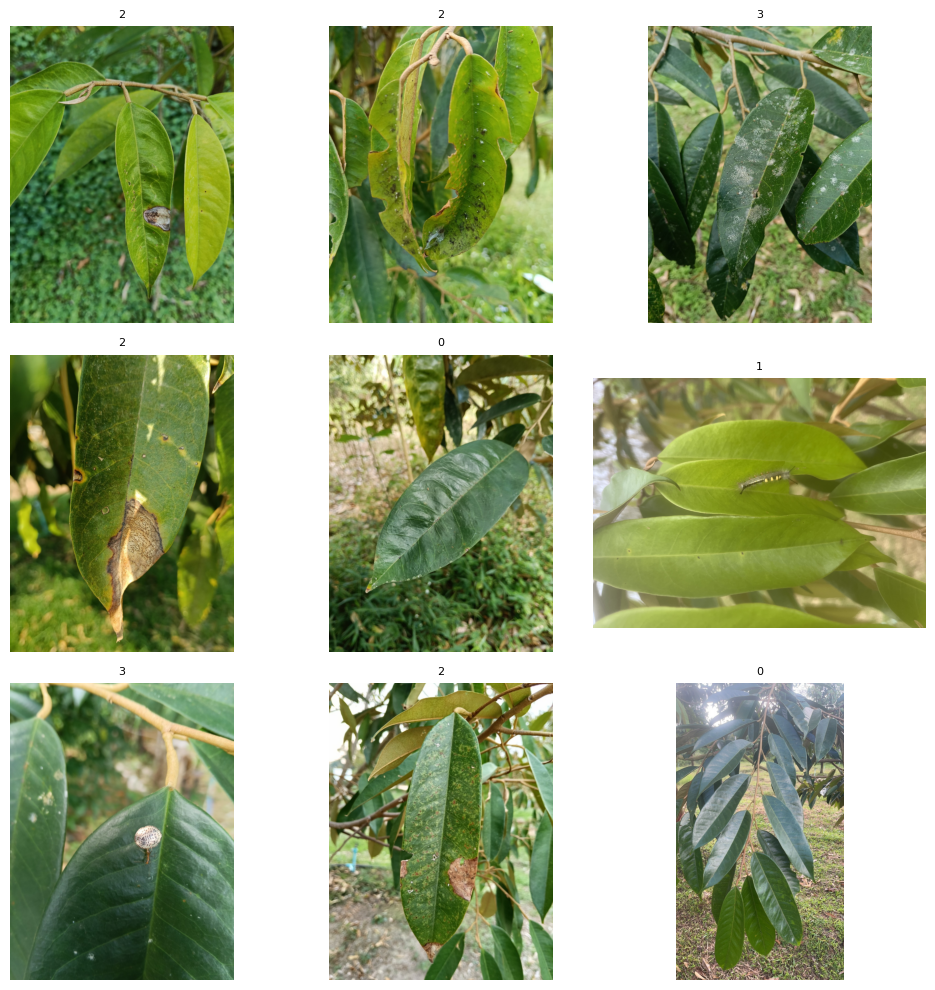

In [21]:
# Set folder path where images are stored and the annotation file
folder_path = "/content/train"  # Change this to your image directory
annotation_file = "/content/train.csv"  # Change this to your annotation JSON file

# Get random images and display them
random_images, image_labels = get_random_images(folder_path, annotation_file)
display_image_grid(random_images, image_labels, folder_path)

### Sample Test Images

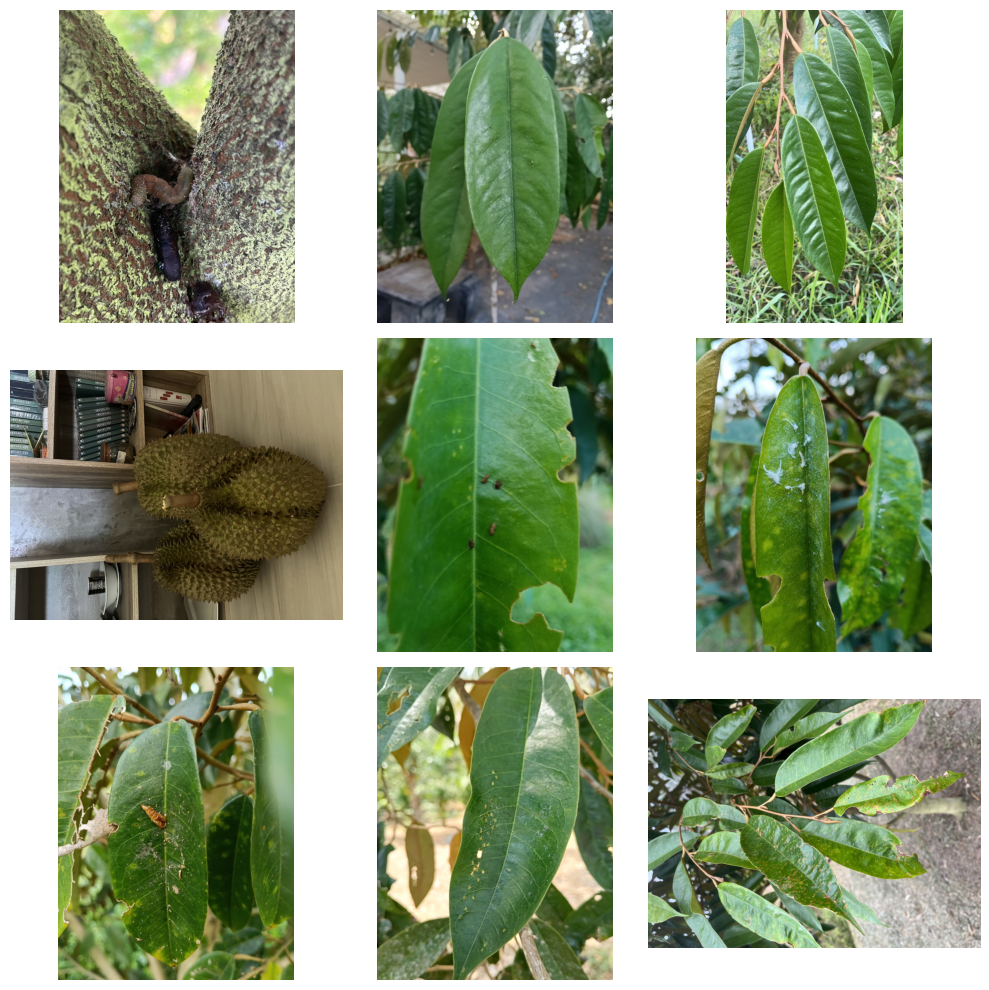

In [22]:
# Set folder path where images are stored and the annotation file
folder_path = "/content/test"  # Change this to your image directory

# Get random images and display them
random_images = get_random_files(folder_path , 9)
display_image_grid_test(random_images , folder_path)

## Prepate Data to train yolo

In [28]:
from tqdm.notebook import tqdm

In [44]:
!mkdir dataset/val/0 dataset/val/1 dataset/val/2 dataset/val/3
!mkdir dataset/train/0 dataset/train/1 dataset/train/2 dataset/train/3

In [45]:
for idx , row in tqdm(train_df.iterrows()):

    img_id = row['id']
    label = row['label']

    src = f'/content/train/{img_id}'
    dst = f'/content/dataset/train/{label}/{img_id}'

    shutil.copy(src , dst)

for idx , row in tqdm(train_df.iterrows()):

    img_id = row['id']
    label = row['label']

    src = f'/content/train/{img_id}'
    dst = f'/content/dataset/val/{label}/{img_id}'

    shutil.copy(src , dst)


0it [00:00, ?it/s]

## YOLOv11 Training

In [47]:
!rm -rf /content/runs

In [31]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [33]:
import torch
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [54]:
# Function to check and set device
def get_device():
    if torch.cuda.is_available():
        print("Using GPU:", torch.cuda.get_device_name(0))
        return torch.device("cuda")
    elif torch.backends.mps.is_available():
        print("Using Apple MPS (Mac)")
        return torch.device("mps")
    else:
        print("Using CPU")
        return torch.device("cpu")

# Set the device
device = get_device()

Using GPU: NVIDIA A100-SXM4-40GB


In [70]:
# Configuration
DATASET_PATH = "/content/dataset"  # Ensure this path is correct and structured properly
MODEL_NAME = "yolo11x-cls.pt"  # Use the largest model available for higher accuracy
EPOCHS = 100  # Increase training epochs for better convergence
IMG_SIZE = 384  # Increase image size to capture finer details (224 → 384)
BATCH_SIZE = 16  # Increase batch size if GPU memory allows (16 → 32)

In [71]:
# Load YOLO classification model
model = YOLO(MODEL_NAME)

In [ ]:
# Train the model
model.train(data=DATASET_PATH, epochs=EPOCHS, imgsz=IMG_SIZE, batch=BATCH_SIZE, device=device)

# Evaluate the model after training
metrics = model.val()
print(metrics)

## Model Prediction

In [2]:
import os
import pandas as pd
from ultralytics import YOLO
from tqdm.notebook import tqdm

# Configuration
MODEL_PATH = "/content/runs/classify/train6/weights/best.pt"  # Path to trained YOLO classification model
TEST_FOLDER = "/content/test"  # Folder containing test images
SUBMISSION_FILE = "/content/submission.csv"  # Output CSV file

# Load the trained YOLO model
model = YOLO(MODEL_PATH)

# Get all image files from the test folder
image_files = [f for f in os.listdir(TEST_FOLDER) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Prepare results list
results_list = []

# Run batch predictions
for img_name in tqdm(image_files):

    img_path = os.path.join(TEST_FOLDER, img_name)
    result = model.predict(img_path)

    # Extract predicted class
    pred_class = result[0].probs.top1  # Get the most probable class

    # Append to results list
    results_list.append({"id": img_name, "predict": pred_class})

# Convert to DataFrame
df = pd.DataFrame(results_list)

# Save to CSV
df.to_csv(SUBMISSION_FILE, index=False)

print(f"Submission file saved: {SUBMISSION_FILE}")


  0%|          | 0/278 [00:00<?, ?it/s]


image 1/1 /content/test/b2d0d2d9efee736e33ef6ba412a2afec.jpg: 640x640 1 1.00, 3 0.00, 2 0.00, 0 0.00, 10.4ms
Speed: 52.4ms preprocess, 10.4ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test/b143fb620ac44eeba6c1fd12317a79ab.jpg: 640x640 0 1.00, 2 0.00, 3 0.00, 1 0.00, 10.6ms
Speed: 36.3ms preprocess, 10.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test/56b0c3847cc397ae36536c597c89510e.jpg: 640x640 2 1.00, 1 0.00, 3 0.00, 0 0.00, 10.6ms
Speed: 21.4ms preprocess, 10.6ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test/108cbeb85f744a2fc1d106021f1558a5.jpg: 640x640 2 1.00, 3 0.00, 1 0.00, 0 0.00, 10.0ms
Speed: 21.0ms preprocess, 10.0ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/test/e8afb871aba4ad954ef48abcbb606cdb.jpg: 640x640 3 0.98, 0 0.02, 1 0.00, 2 0.00, 10.4ms
Speed: 21.0ms preprocess, 10.4ms inference, 0.0ms postproc

In [3]:
!kaggle competitions submit -c durian-hackathon-durian-disease-classification -f /content/submission.csv -m "YOLOv11x - 100 Epochs"

100% 10.6k/10.6k [00:00<00:00, 12.7kB/s]
Successfully submitted to Durian Hackathon: Durian Disease Classification

In [5]:
!kaggle competitions submissions -c durian-hackathon-durian-disease-classification

fileName        date                 description                                    status    publicScore  privateScore  
--------------  -------------------  ---------------------------------------------  --------  -----------  ------------  
submission.csv  2025-02-17 23:18:26  YOLOv11x - 100 Epochs                          complete  0.79279      0.83537       
submission.csv  2025-02-17 22:32:36  YOLOv11x - 100 Epochs                          complete  0.72086      0.79421       
submission.csv  2025-02-17 22:26:26  YOLOv11x - 100 Epochs                          complete  0.81331      0.83680       
submission.csv  2025-02-17 15:21:46  maxvit / Augment / 300 epochs                  complete  0.84863      0.84095       
submission.csv  2025-02-16 06:45:19  maxvit / Augment                               complete  0.81482      0.85086       
miracle.csv     2025-02-16 06:11:50                                                 complete  0.82200      0.84469       
miracle.csv     2025-02-